## Introduction to Dask

[Dask](https://dask.org/) is a library for scalable computing in Python. It primarily does two things: 

1. Scheduling tasks on a cluster. This helps parallelize intensive computational tasks. 

2. Contains implementations of collections for large datasets. This helps manage large datasets, so that scheduling tasks on them becomes more easy to do.

Let's start with scheduling and how that works. We'll start with a trivial computational task. The following cell implements two simple computational operations. An `inc` function that increments a number by 1, and an `add` function that adds together two numbers. To demonstrate the effects of parallelization, we will also have each one of these functions sleep for a little while, to simulate more intensive time-demanding computations. 

In [1]:
import time

def inc(x):
    time.sleep(1)
    return x + 1

def add(x, y):
    time.sleep(1)
    return x + y

How much time would it take increment two numbers and add them together?

In [2]:
%%time
x1 = inc(1)
x2 = inc(2)
z = add(x1, x2)

CPU times: user 1.78 ms, sys: 104 µs, total: 1.89 ms
Wall time: 3 s


## Introducing the `delayed` decorator

First of all, what is a decorator? One way to think about it (but it's not the [full](https://matthew-brett.github.io/pydagogue/decorating_for_dummies.html) [story](https://matthew-brett.github.io/pydagogue/decorating_for_smart_people.html)) is that it's a function that takes a function as input and produces a function as output. 

This means that we can process a function that we have written, so that it does something slightly different than it was originally intended to do. 

In the case of the dask `delayed` decorator, the execution of the function is deferred until a full computational graph can be derived. 

Let's see what that means in practice. Let's create delayed versions of our `add` and `inc` functions:


In [3]:
from dask import delayed

delayed_inc = delayed(inc)
delayed_add = delayed(add)

What are these things? 

In [4]:
print(type(delayed_inc))
print(type(delayed_add))

<class 'dask.delayed.DelayedLeaf'>
<class 'dask.delayed.DelayedLeaf'>


That's odd. Are these things like a function?

In [5]:
print(callable(delayed_inc))
print(callable(delayed_add))

True
True


Looks like they are. What happens when we call them?

In [6]:
%%time
x1 = delayed_inc(1)
x2 = delayed_inc(2)
z = delayed_add(x1, x2)

CPU times: user 588 µs, sys: 0 ns, total: 588 µs
Wall time: 534 µs


Whoa. That was fast! Does `z` take the expected value?

In [7]:
z

Delayed('add-08ebb450-a70c-4738-973b-7cecee8b445d')

Hmm. Doesn't look like it. In fact, no computation has occurred so far. Dask has only computed a computational graph that it will execute when we call the object's `compute` method.

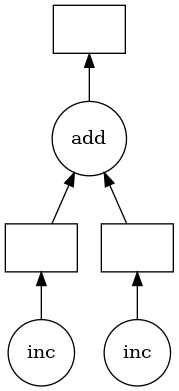

In [8]:
z.visualize()

It's only when we call the `compute` method that the work is done.

In [9]:
%%time
z.compute()

CPU times: user 8.69 ms, sys: 1.27 ms, total: 9.97 ms
Wall time: 2.01 s


5

The result is emitted and the computation now takes 2 seconds instead of three! 

Things to think about: 
- Why did we go from 3s to 2s? Why weren't we able to parallelize down to 1s?
- What would have happened if the inc and add functions didn't include the sleep(1)? Would Dask still be able to speed up this code?
- What if we have multiple outputs or also want to get access to x or y?    

## Exercise: Parallelize a for loop

`for` loops are one of the most common things that we want to parallelize.  Use `dask.delayed` on `inc` and `sum` to parallelize the computation below:

In [ ]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

In [ ]:
total

In [ ]:
%%time
# Your parallel code here...